<a href="https://colab.research.google.com/github/melihilerialkan/INF505DM-Projekt/blob/main/INF505DM_Projekt_DataWorms_PythonImplementierung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

 *Necessary libraries were imported.
Within the dataset, the columns were separated from each other using semicolons. This has been replaced with a comma.*

In [ ]:
# Pandas is used for data manipulation
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
# Read in data and display first 5 rows


In [ ]:
dataset = pd.read_csv('/content/bank_marketing_adal_v1.0.csv')

In [ ]:
#read input file
file = open("/content/bank_marketing_adal_v1.0.csv", "rt")
#read file contents to string
data = file.read()
#replace all occurrences of the required string
data = data.replace(';', ',')
#close the input file
file.close()
#open the input file in write mode
file = open('/content/abc.csv', "wt")
#overrite the input file with the resulting data
file.write(data)
#close the file
file.close()

In [ ]:
features = pd.read_csv('/content/abc.csv')

# Understanding

*Visualization is done for continuous variables. Outliers were calculated using the IQR method. The found data were revised to be a balanced data set.Limit ranges for categorical data were determined.*

In [ ]:
#Trying to find some strange values or null values
print('Max Kontostand: ', features['Kontostand'].max())
print('Min Kontostand: ', features['Kontostand'].min())
print('Null Values: ', features['Kontostand'].isnull().any())

Max Kontostand:  19985
Min Kontostand:  -4057
Null Values:  False


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


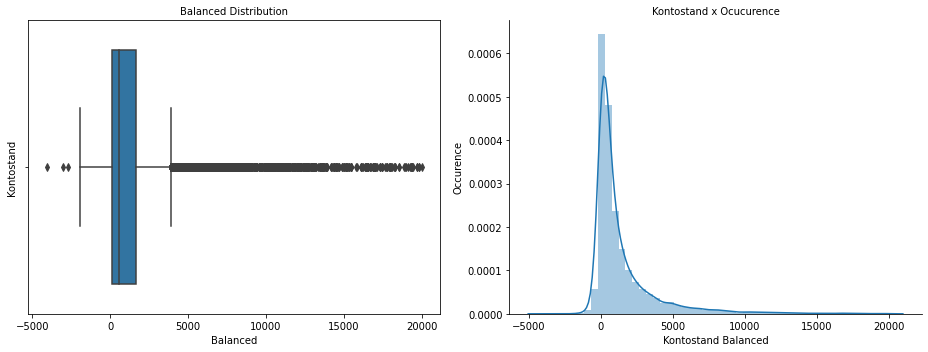

In [ ]:
#visualization method for the reduce number of Outliers in Contuinous Variables
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Kontostand', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('Balanced', fontsize=10)
ax1.set_ylabel('Kontostand', fontsize=10)
ax1.set_title('Balanced Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(features['Kontostand'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Kontostand Balanced', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Kontostand x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
#With IQR Method, calculate the outliers
from scipy.stats import iqr
# Quartiles
Q1 = features['Kontostand'].quantile(q = 0.25)
Q3 = features['Kontostand'].quantile(q = 0.75)
print('1º Quartile: ', Q1 )
print('2º Quartile: ', features['Kontostand'].quantile(q = 0.50))
print('3º Quartile: ', Q3)
print('4º Quartile: ', features['Kontostand'].quantile(q = 1.00))

#Calculate the outliers:
  
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Kontostand calls above: ', features['Kontostand'].quantile(q = 0.75) + 
                      1.5*(features['Kontostand'].quantile(q = 0.75) - features['Kontostand'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  141.0
2º Quartile:  561.0
3º Quartile:  1640.0
4º Quartile:  19985.0
Kontostand calls above:  3888.5 are outliers
-2107.5


3888.5

In [ ]:
#Drop the Ouutliers
features = features[(features['Kontostand']>-2107.5)&(features['Kontostand']<3888.5)]

In [ ]:
#Trying to find some strange values or null values
print('Max age: ', features['Alter'].max())
print('Min age: ', features['Alter'].min())
print('Null Values: ', features['Alter'].isnull().any())

Max age:  69
Min age:  18
Null Values:  False


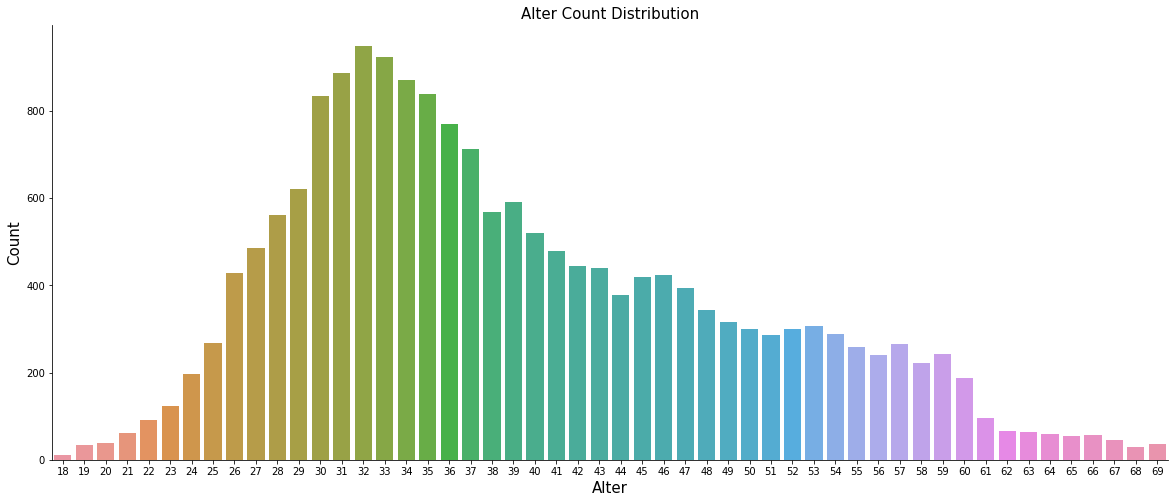

In [ ]:
#Continious Data plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Alter', data = features)
ax.set_xlabel('Alter', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Alter Count Distribution', fontsize=15)
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


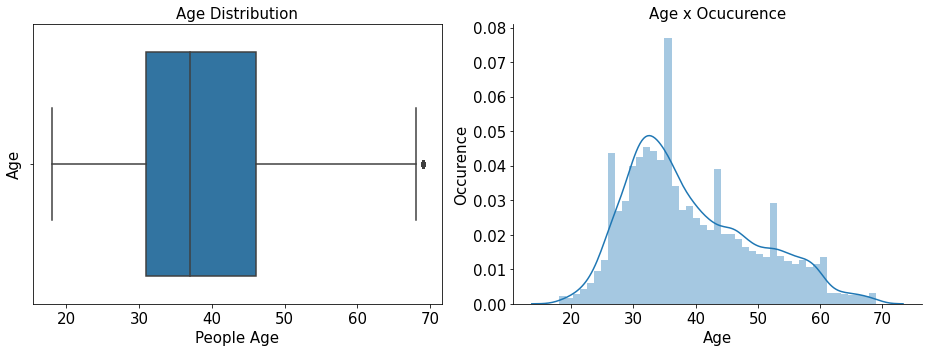

In [ ]:
#visualization method for the reduce number of Outliers in Contuinous Variables
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Alter', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(features['Alter'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartiles
from scipy.stats import iqr
Q1 = features['Alter'].quantile(q = 0.25)
Q3 = features['Alter'].quantile(q = 0.75)
print('1º Quartile: ', Q1)
print('2º Quartile: ', features['Alter'].quantile(q = 0.50))
print('3º Quartile: ', Q3 )
print('4º Quartile: ', features['Alter'].quantile(q = 1.00))
#Calculate the outliers:
IQR = Q3 - Q1
lower =Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Alters above: ', features['Alter'].quantile(q = 0.75) + 
                      1.5*(features['Alter'].quantile(q = 0.75) - features['Alter'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  31.0
2º Quartile:  37.0
3º Quartile:  46.0
4º Quartile:  69.0
Alters above:  68.5 are outliers
8.5


68.5

In [ ]:
features = features[(features['Alter']>8.5)&(features['Alter']<68.5)]

In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(features['Alter'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(features['Alter'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(features['Alter'].std()*100/features['Alter'].mean(), 1), ', High middle dispersion')

MEAN: 39.2
STD : 10.2
CV  : 26.0 , High middle dispersion


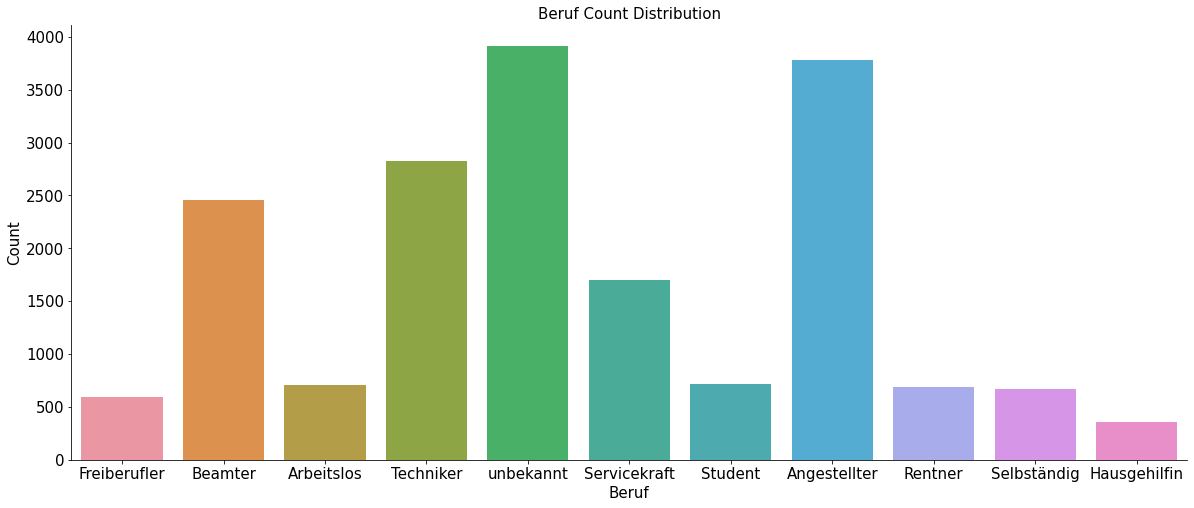

In [ ]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Beruf', data = features)
ax.set_xlabel('Beruf', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Beruf Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

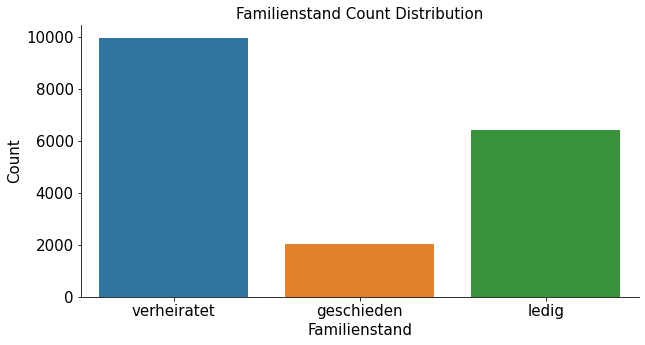

In [ ]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'Familienstand', data = features)
ax.set_xlabel('Familienstand', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Familienstand Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

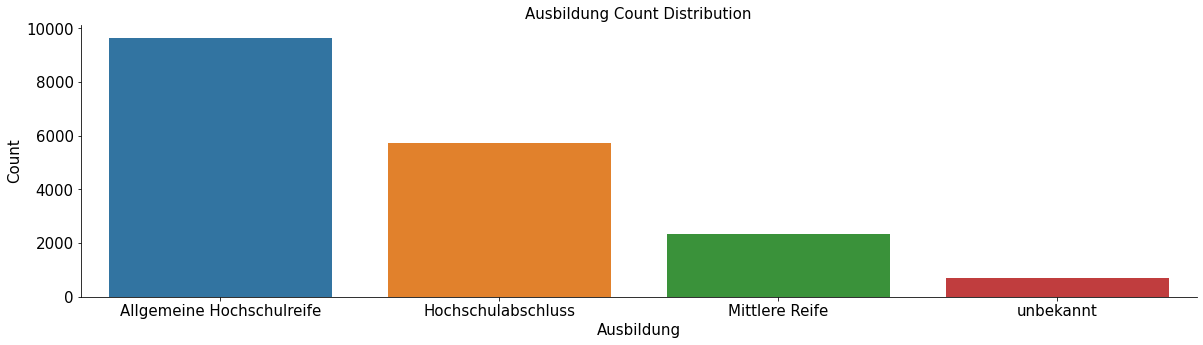

In [ ]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'Ausbildung', data = features)
ax.set_xlabel('Ausbildung', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Ausbildung Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

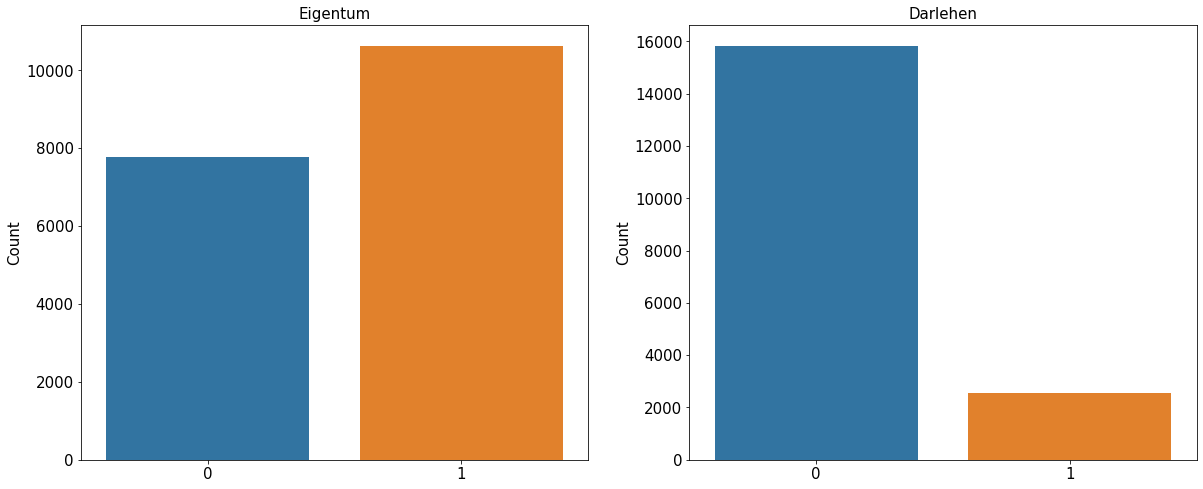

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(x = 'Eigentum', data = features, ax = ax1)
ax1.set_title('Eigentum', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'Darlehen', data = features, ax = ax2)
ax2.set_title('Darlehen', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


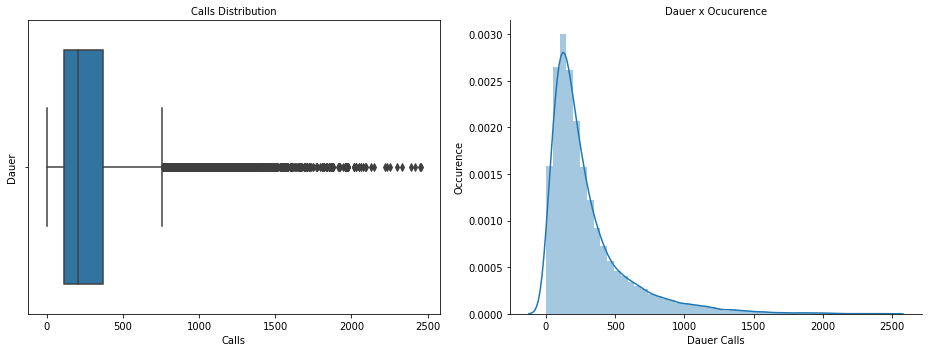

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Dauer', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Dauer', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(features['Dauer'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Dauer Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Dauer x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartiles
Q1= features['Dauer'].quantile(q = 0.25)
Q3= features['Dauer'].quantile(q = 0.75)
print('1º Quartile: ',Q1)
print('2º Quartile: ', features['Dauer'].quantile(q = 0.50))
print('3º Quartile: ',Q3)
print('4º Quartile: ', features['Dauer'].quantile(q = 1.00))
#Calculate the outliers:
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Dauer above: ', features['Dauer'].quantile(q = 0.75) + 
                      1.5*(features['Dauer'].quantile(q = 0.75) - features['Dauer'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  112.0
2º Quartile:  204.0
3º Quartile:  371.0
4º Quartile:  2456.0
Dauer above:  759.5 are outliers
-276.5


759.5

In [ ]:
features = features[(features['Dauer']>-276.5)&(features['Dauer']<759.5)]

# Columns Distrubition

*Distributions were made and visualized between two columns that were seen as important. Thus, the data set was understood more clearly.*

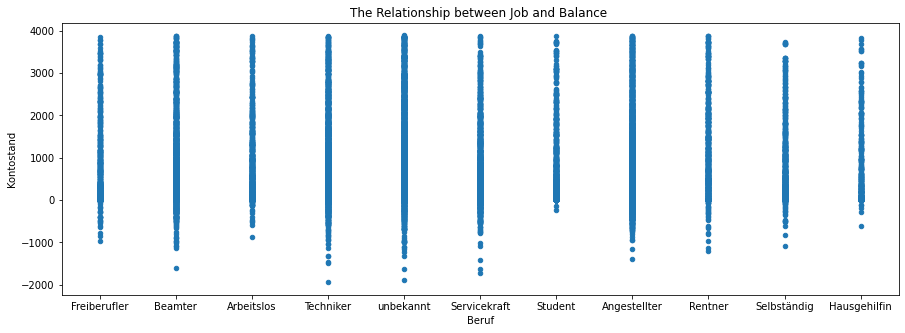

In [ ]:
scatter_age_balance = features.plot.scatter('Beruf','Kontostand',figsize = (15,5))

plt.title('The Relationship between Job and Balance ')
plt.show()

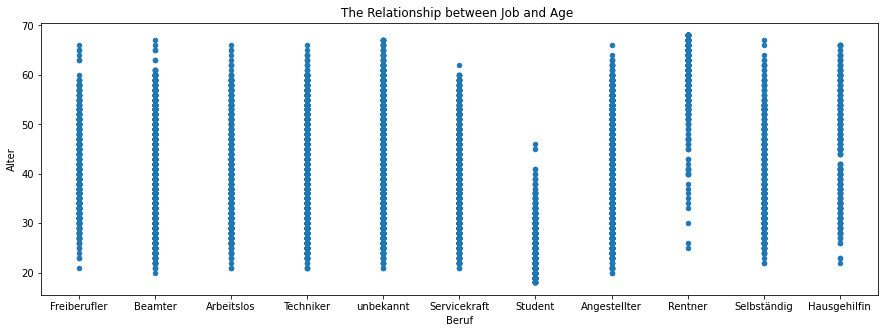

In [ ]:
scatter_age_balance = features.plot.scatter('Beruf','Alter',figsize = (15,5))

plt.title('The Relationship between Job and Age ')
plt.show()

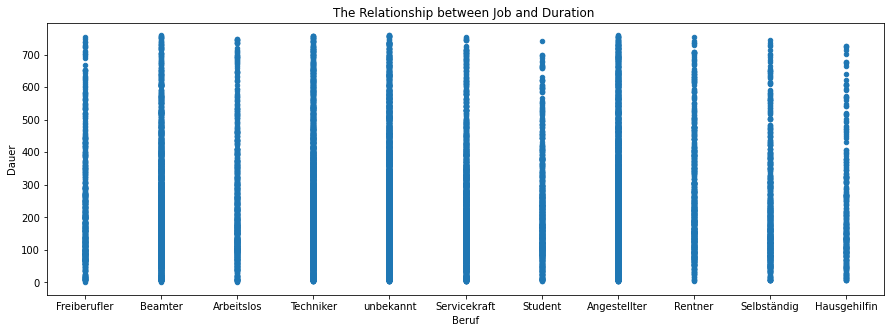

In [ ]:
scatter_age_balance = features.plot.scatter('Beruf','Dauer',figsize = (15,5))

plt.title('The Relationship between Job and Duration ')
plt.show()

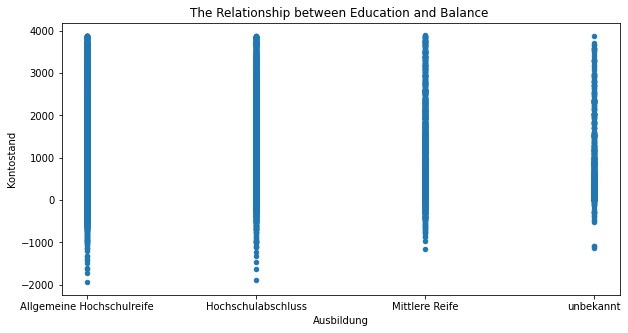

In [ ]:
scatter_age_balance = features.plot.scatter('Ausbildung','Kontostand',figsize = (10,5))

plt.title('The Relationship between Education and Balance ')
plt.show()

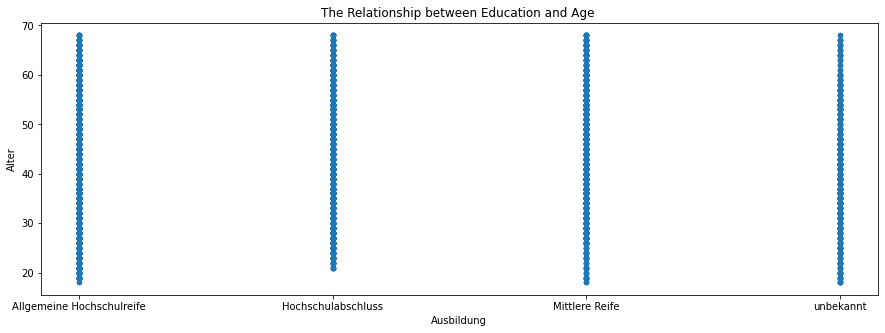

In [ ]:
scatter_age_balance = features.plot.scatter('Ausbildung','Alter',figsize = (15,5))

plt.title('The Relationship between Education and Age ')
plt.show()

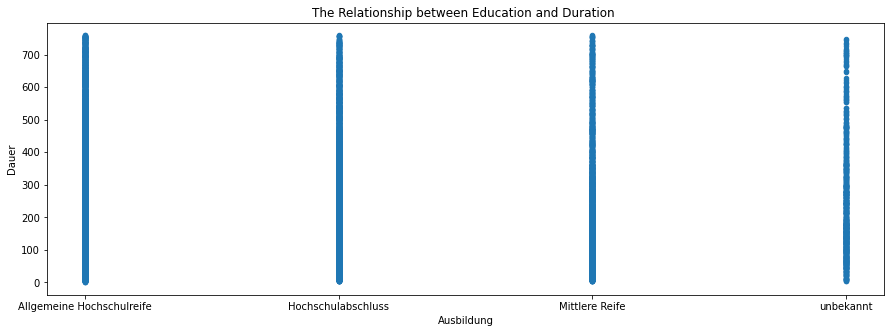

In [ ]:
scatter_age_balance = features.plot.scatter('Ausbildung','Dauer',figsize = (15,5))

plt.title('The Relationship between Education and Duration ')
plt.show()

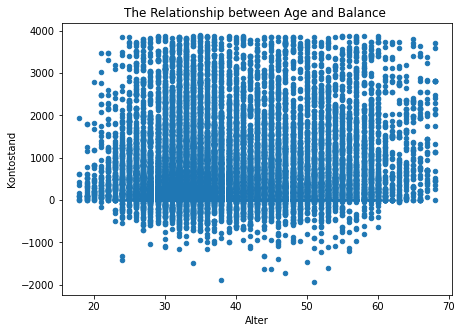

In [ ]:
scatter_age_balance = features.plot.scatter('Alter','Kontostand',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

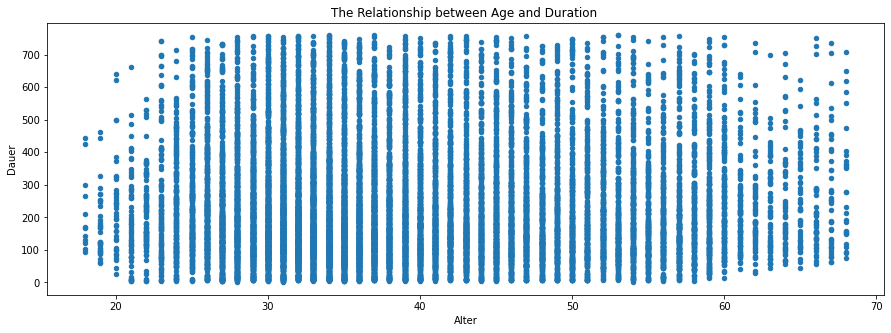

In [ ]:
scatter_age_balance = features.plot.scatter('Alter','Dauer',figsize = (15,5))

plt.title('The Relationship between Age and Duration ')
plt.show()

# Preprocessing


*Unknown data on the dataset set to Null. The categorical data type was separated by the 'Cat_Codes' method. Null values were predicted using the Decision Tree Method.*

In [ ]:
features.replace('unbekannt', np.nan, inplace=True)


In [ ]:
features.isnull().sum()

Alter               0
Beruf            3629
Familienstand       0
Ausbildung        661
Ausgefallen         0
Kontostand          0
Eigentum            0
Darlehen            0
Dauer               0
Label               0
dtype: int64

In [ ]:
def convert_cats(df,cols):
  for i in cols:
    df[i] = df[i].astype("category").cat.codes
  return df


In [ ]:
 features=convert_cats(features,['Beruf','Ausbildung','Familienstand'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
    
def fillMissing(missing_cols , df):

  df1=df.copy()
  for col in missing_cols:
    
    test=df1[df1[col]==-1]
    train=df1[df1[col]!=-1]
    tree=DecisionTreeClassifier()
    tree.fit(train.drop(col,axis=1),train[col])
    test.loc[:,col]=tree.predict(test.drop(col,axis=1))
    df1 = train.append(test)

  return df1

In [ ]:
features= fillMissing(['Beruf','Ausbildung'],features.copy())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
features["Beruf"].value_counts()

0    3767
9    3556
2    2837
7    1767
6    1164
3     965
1     913
8     818
5     773
4     443
Name: Beruf, dtype: int64

In [ ]:
features.shape

(17003, 10)

# Resampling


*Looking at the distributions on the "Label" column of our data, we have an unbalanced data group. Divided into minor and major groups to balance the samples. Resample was used to make "oversample" on minor data in order to give higher accuracy of train operation.*

In [ ]:
features.value_counts('Label')

Label
0    13837
1     3166
dtype: int64

In [ ]:
df_majority = features[features['Label'] == 0]
df_minority = features[features['Label'] == 1]


In [ ]:
df_majority.shape

(13837, 10)

In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(df_majority.shape[0]),    
                                 random_state=4711) 

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled],axis =0,
          ignore_index =True)


In [ ]:
features = df_upsampled

# Understanding for new Features

*Outliers cleaning process and visualization were performed on the newly created data set.*

In [ ]:
features.shape

(27674, 10)

In [ ]:
#Trying to find some strange values or null values
print('Min Kontostand: ', features['Kontostand'].max())
print('Max Kontostand: ', features['Kontostand'].min())
print('Null Values: ', features['Kontostand'].isnull().any())

Min Kontostand:  3888
Max Kontostand:  -1944
Null Values:  False


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


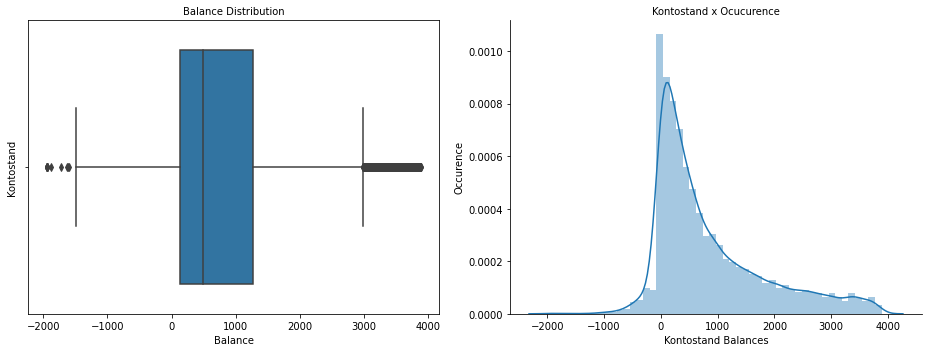

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Kontostand', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('Balance', fontsize=10)
ax1.set_ylabel('Kontostand', fontsize=10)
ax1.set_title('Balance Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(features['Kontostand'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Kontostand Balances', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Kontostand x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
from scipy.stats import iqr
# Quartiles
Q1 = features['Kontostand'].quantile(q = 0.25)
Q3 = features['Kontostand'].quantile(q = 0.75)
print('1º Quartile: ', Q1 )
print('2º Quartile: ', features['Kontostand'].quantile(q = 0.50))
print('3º Quartile: ', Q3)
print('4º Quartile: ', features['Kontostand'].quantile(q = 1.00))

#Calculate the outliers:
  
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Kontostand above: ', features['Kontostand'].quantile(q = 0.75) + 
                      1.5*(features['Kontostand'].quantile(q = 0.75) - features['Kontostand'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  133.0
2º Quartile:  487.0
3º Quartile:  1276.0
4º Quartile:  3888.0
Kontostand above:  2990.5 are outliers
-1581.5


2990.5

In [ ]:
features = features[(features['Kontostand']>lower)&(features['Kontostand']<Upper)]

In [ ]:
#Trying to find some strange values or null values
print('Min age: ', features['Alter'].max())
print('Max age: ', features['Alter'].min())
print('Null Values: ', features['Alter'].isnull().any())

Min age:  68
Max age:  18
Null Values:  False


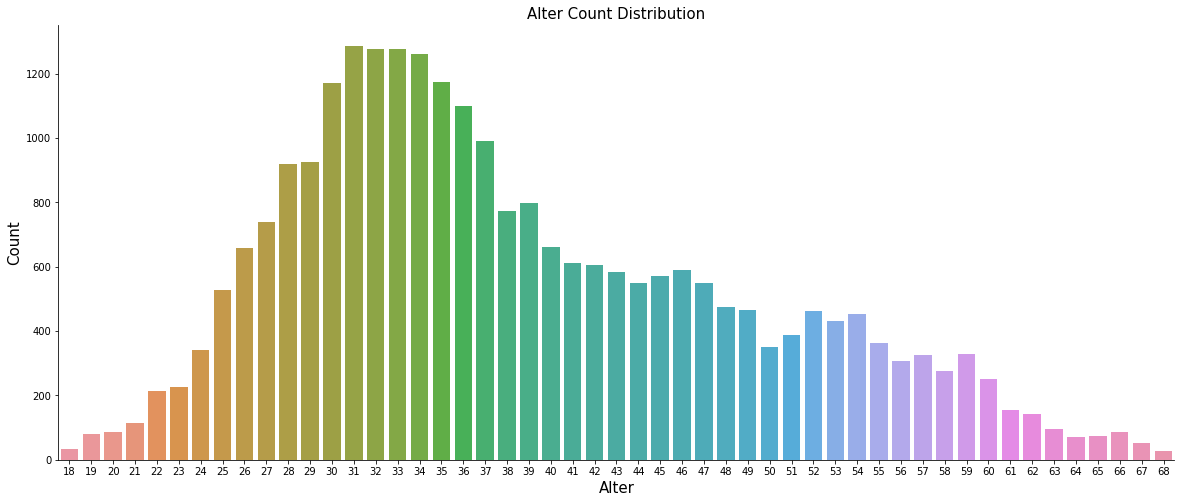

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Alter', data = features)
ax.set_xlabel('Alter', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Alter Count Distribution', fontsize=15)
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


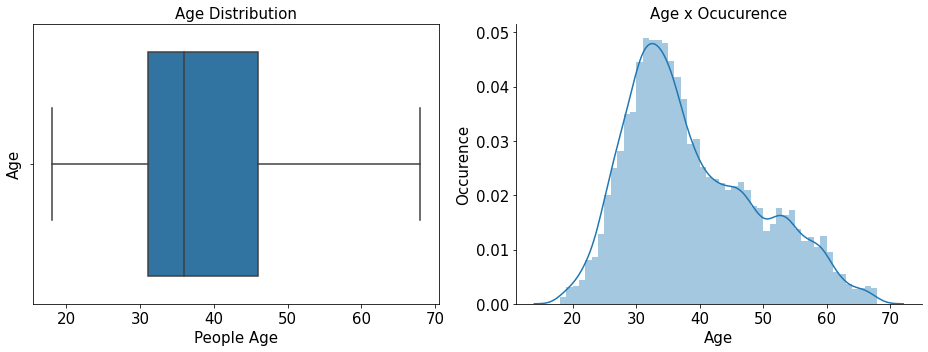

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Alter', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(features['Alter'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartiles
from scipy.stats import iqr
Q1 = features['Alter'].quantile(q = 0.25)
Q3 = features['Alter'].quantile(q = 0.75)
print('1º Quartile: ', Q1)
print('2º Quartile: ', features['Alter'].quantile(q = 0.50))
print('3º Quartile: ', Q3 )
print('4º Quartile: ', features['Alter'].quantile(q = 1.00))
#Calculate the outliers:
IQR = Q3 - Q1
lower =Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Alters above: ', features['Alter'].quantile(q = 0.75) + 
                      1.5*(features['Alter'].quantile(q = 0.75) - features['Alter'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  31.0
2º Quartile:  36.0
3º Quartile:  46.0
4º Quartile:  68.0
Alters above:  68.5 are outliers
8.5


68.5

In [ ]:
features = features[(features['Alter']>lower)&(features['Alter']<Upper)]

In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(features['Alter'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(features['Alter'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(features['Alter'].std()*100/features['Alter'].mean(), 1), ', High middle dispersion')

MEAN: 38.7
STD : 10.3
CV  : 26.7 , High middle dispersion


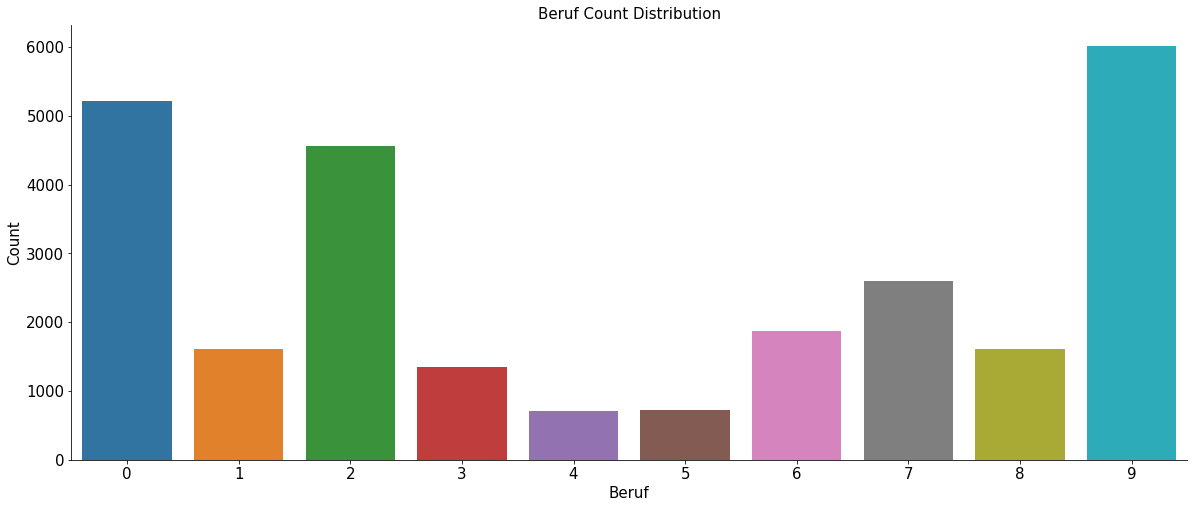

In [ ]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Beruf', data = features)
ax.set_xlabel('Beruf', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Beruf Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

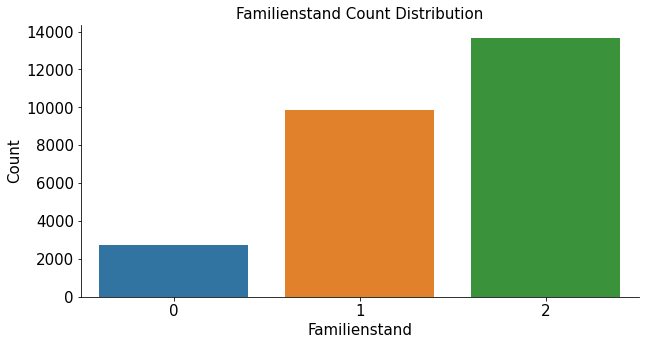

In [ ]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'Familienstand', data = features)
ax.set_xlabel('Familienstand', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Familienstand Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

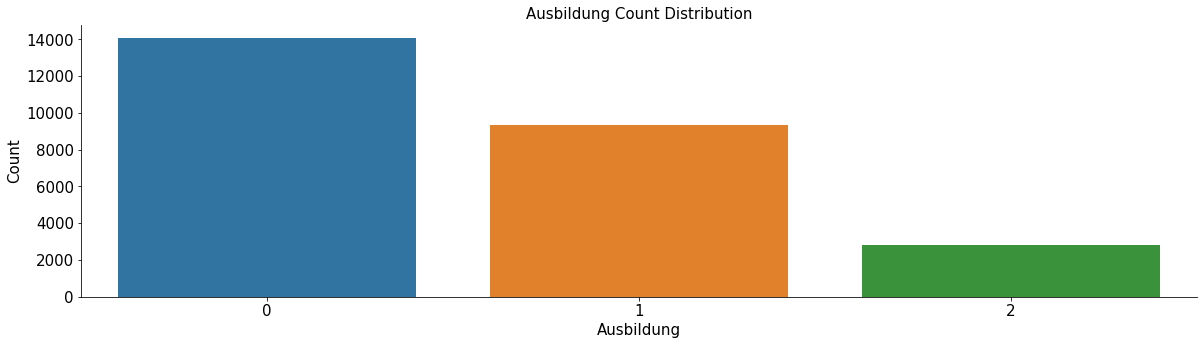

In [ ]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'Ausbildung', data = features)
ax.set_xlabel('Ausbildung', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Ausbildung Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

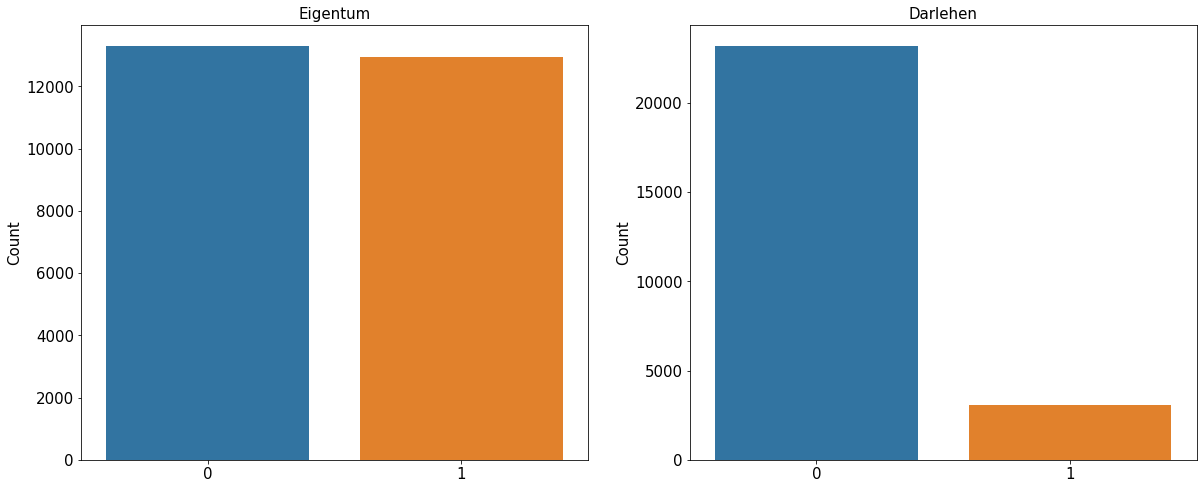

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(x = 'Eigentum', data = features, ax = ax1)
ax1.set_title('Eigentum', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'Darlehen', data = features, ax = ax2)
ax2.set_title('Darlehen', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


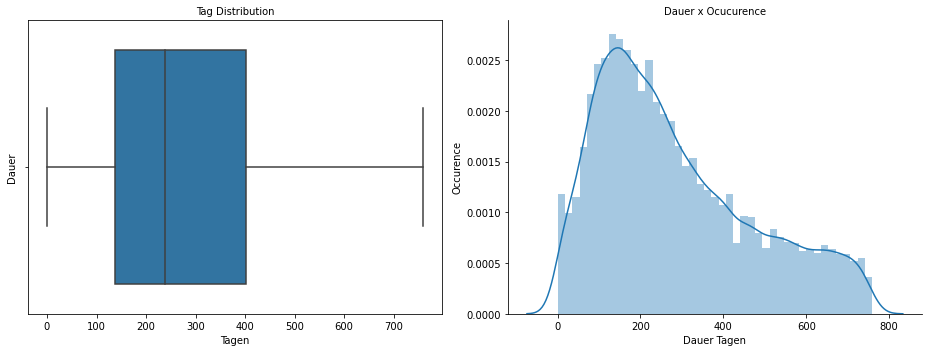

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Dauer', data = features, orient = 'v', ax = ax1)
ax1.set_xlabel('Tagen', fontsize=10)
ax1.set_ylabel('Dauer', fontsize=10)
ax1.set_title('Tag Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(features['Dauer'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Dauer Tagen', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Dauer x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [ ]:
# Quartiles
Q1= features['Dauer'].quantile(q = 0.25)
Q3= features['Dauer'].quantile(q = 0.75)
print('1º Quartile: ',Q1)
print('2º Quartile: ', features['Dauer'].quantile(q = 0.50))
print('3º Quartile: ',Q3)
print('4º Quartile: ', features['Dauer'].quantile(q = 1.00))
#Calculate the outliers:
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
Upper = Q3 + 1.5 * IQR
    
print('Dauer above: ', features['Dauer'].quantile(q = 0.75) + 
                      1.5*(features['Dauer'].quantile(q = 0.75) - features['Dauer'].quantile(q = 0.25)), 'are outliers')
print(lower)
Upper

1º Quartile:  137.0
2º Quartile:  238.0
3º Quartile:  402.0
4º Quartile:  759.0
Dauer above:  799.5 are outliers
-260.5


799.5

In [ ]:
features = features[(features['Dauer']>0)&(features['Dauer']<Upper)]

In [ ]:
features.shape

(26251, 10)

# Train

*Dataset was split for test and train operation. Hyperparameters of RandomForest algorithm were tuned with Grid Search method. The success of train data was measured using Cross Validation. Results were visualized with Correlation matrix and Confusion Matrix. The importance levels of the columns were determined in the Random Forest classification algorithm. A small decision tree was drawn for a visual understanding of the results.*



In [ ]:
y_new = features['Label']

In [ ]:
features = features.drop(['Label'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np 

X_train, X_test, y_train, y_test = train_test_split(features, y_new, test_size = 0.3, random_state = 4711)
k_fold = KFold(n_splits=10, shuffle=True, random_state=4711)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (18375, 9)
Training Labels Shape: (18375,)
Testing Features Shape: (7876, 9)
Testing Labels Shape: (7876,)


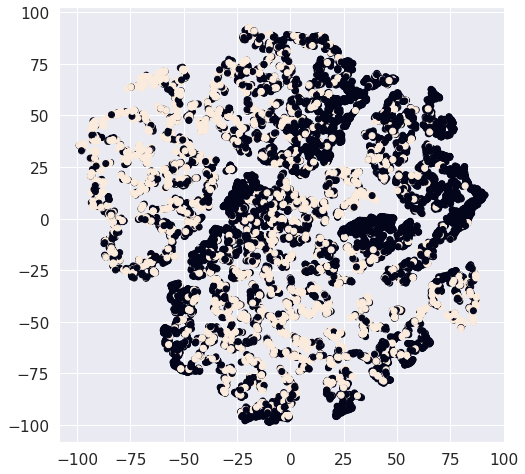

In [ ]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=4711, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

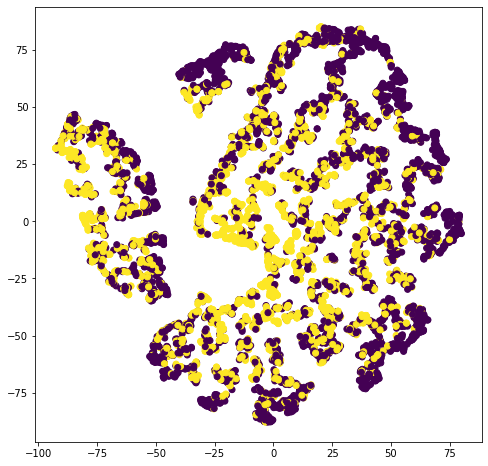

In [ ]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=4711, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ["entropy","gini"],
    'random_state' : [4711],
    'max_depth': [8, 16, None],
    'max_features': ["auto","sqrt"],
    'n_estimators': [350, 500]
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = k_fold, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 24.6min finished


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500,
 'random_state': 4711}

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test,y_test)

0.9259776536312849

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 500, n_jobs=-1, random_state = 4711)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc,X_train , y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())

In [ ]:
rfc.score(X_test,y_test)

0.9267394616556628

In [ ]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.923211


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,rfcpred))
print(classification_report(y_test,rfcpred))
print(accuracy_score(y_test, rfcpred))

[[3456  501]
 [  76 3843]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3957
           1       0.88      0.98      0.93      3919

    accuracy                           0.93      7876
   macro avg       0.93      0.93      0.93      7876
weighted avg       0.93      0.93      0.93      7876

0.9267394616556628


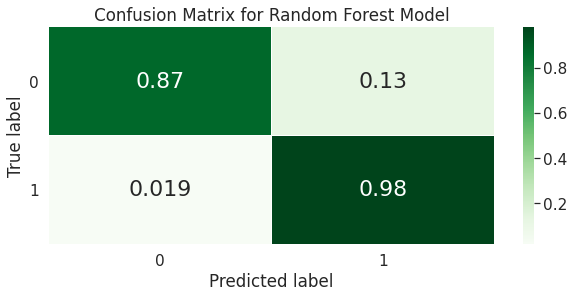

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfcpred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':22},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0, 1]
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

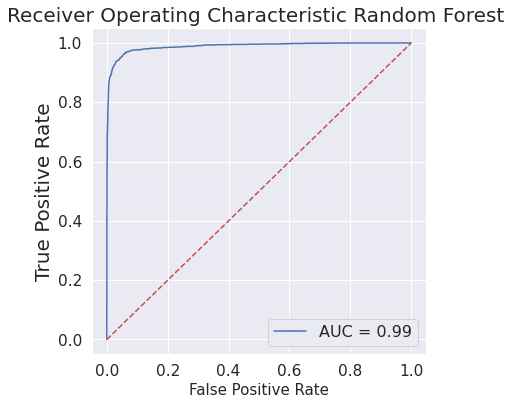

In [ ]:
from sklearn import metrics
%matplotlib inline
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [ ]:
feature_list = list(features)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Dauer                Importance: 0.41
Variable: Kontostand           Importance: 0.2
Variable: Alter                Importance: 0.16
Variable: Beruf                Importance: 0.08
Variable: Eigentum             Importance: 0.07
Variable: Familienstand        Importance: 0.03
Variable: Ausbildung           Importance: 0.03
Variable: Darlehen             Importance: 0.01
Variable: Ausgefallen          Importance: 0.0


In [ ]:
# Limit depth of tree to 5 levels

from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestClassifier(criterion='gini', 
                             n_estimators=250,
                             max_depth = 5,
                             max_features='auto',
            
                             random_state=4711,
                             n_jobs=-1)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');